In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd ## Used only to read data

In [2]:
# Loading dataset
data1 = pd.read_csv('datasets/bank-additional-full.csv',sep =';')

In [3]:
# Function to convert the string data points to categorical data points
def categorical(x):
    cat = []
    t = 0
    for i in range(0,len(x)):
        if(x[i] == 'unknown'):
            x[i] = 0
        elif(x[i] not in cat):
            cat.append(x[i])
            x[i] = t
            t+=1
        else:
            temp = cat.index(x[i])
            x[i] = temp

In [4]:
# Function to convert a matrix to float values
def to_float(x):
    for i in range(x.shape[0]):
        for j in range(0,x.shape[1]):
            if(x[i][j] == '?'):
                x[i][j] = x[0][j]
            x[i][j] = float(x[i][j])

In [5]:
# Function to convert categorical values to one-hot format
def one_hot(x):
    m = np.max(x)
    res = np.zeros([x.shape[0],int(m)+1])
    for i in range(0,res.shape[0]):
        res[i][int(x[i])] = 1
    return res

In [6]:
## Sigmoid function
def sigmoid(x):
    res = np.empty(x.shape)
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            if(x[i,j]<-700):              #### Used to overcome overflow error
                res[i,j] = 0.0
            else:
                res[i,j] = 1.0/(1+np.exp(-x[i,j]))
    return res

In [7]:
# In this step, we are converting the float data-type to categorical. This might take some time (4-5 minutes) because of large size of dataset
# This step might show a warning. However, this does not affect with the preformance.
ind = [1,2,3,4,5,6,7,8,9,11,13,14,20]
for i in ind:
    print(i)
    categorical(data1.iloc[:,i])
print(data1.shape)

1


/home/raktim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/raktim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/raktim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


2
3
4
5
6
7
8
9
11
13
14
20
(41188, 21)


In [8]:
data2 = np.array(data1)
to_float(data2)

In [9]:
# Converting to one-hot
data3 = []
ind = [1,3,8,9,11,13,14]
for i in range(data2.shape[1]):
    if(i in ind):
        temp = one_hot(data2[:,i])
        for j in range(0,temp.shape[1]):
            data3.append(temp[:,j])
    else:
        data3.append(data2[:,i])

In [10]:
data = np.array(data3)
data = data.T
print(data.shape)

(41188, 100)


In [11]:
### Creating features and labels for train and test set
### 10% of total data used as test data

x_train1 = np.empty([int(data.shape[0]*0.9),data.shape[1]])
y_train1 = np.empty([int(data.shape[0]*0.9),1])
x_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),data.shape[1]])
y_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),1])

for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]-1):
        if(i<int(data.shape[0]*0.9)):
            x_train1[i,j] = data[i][j]
        else:
            x_test1[i-int(data.shape[0]*0.9),j] = data[i][j]

# Using bias term
x_train1[:,99] = 1e-2
x_test1[:,99] = 1e-2


for i in range(0,data.shape[0]):
    if(i<int(data.shape[0]*0.9)):
        y_train1[i,0] = data[i][99]
    else:
        y_test1[i-int(data.shape[0]*0.9),0] = data[i][99]
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(37069, 100) (4119, 100) (37069, 1) (4119, 1)


In [12]:
# Normalization of train set
# print(x_train1)
x_train = np.empty(x_train1.shape)
m = np.empty(x_train.shape[1])
v = np.empty(x_train.shape[1])
ind1 = [0,39,82,94,95,96,97,98]
for i in range(0,x_train1.shape[1]):
    if(i in ind1):
        mean = np.mean(x_train1[:,i])
        var = np.var(x_train1[:,i])
        m[i] = mean
        v[i] = var
        x_train[:,i] = x_train1[:,i] - mean*np.ones(x_train1[:,i].shape)
        x_train[:,i] = x_train[:,i]/var
    else:
        x_train[:,i] = x_train1[:,i]

y_test = y_test1

y_train = y_train1


In [13]:
# Training
epochs = 1000  ## Number of epochs
w = np.ones([x_train.shape[1],1])
batch_size = 37069     ## Batch size
batch = int(x_train.shape[0]/batch_size)
lr = 0.8   ### Learning rate
loss = []
for i in range(0,epochs):
    for b in range(0,batch):
        y_pred = sigmoid(x_train[b:b+batch_size]@w)
        y_pred_t = np.reshape(y_pred,y_pred.shape[0])
                
        w = w - lr*x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_train.shape[0]        
    
    y_pred = sigmoid(x_train@w)
    l1 = -np.sum(y_train*np.log(y_pred+1e-8) + (1-y_train)*np.log(1-y_pred+1e-8))/y_pred.shape[0]
    print("Epoch",i,"Loss",l1)
    loss.append(l1)

Epoch 0 Loss 5.85195591305642
Epoch 1 Loss 3.701436731903124
Epoch 2 Loss 1.9027111791176186
Epoch 3 Loss 0.7587817128167426
Epoch 4 Loss 0.5143253130781452
Epoch 5 Loss 0.45593285454333615
Epoch 6 Loss 0.4273566562624371
Epoch 7 Loss 0.40994971105454403
Epoch 8 Loss 0.3980888659705328
Epoch 9 Loss 0.38936290647355953
Epoch 10 Loss 0.38254395749631
Epoch 11 Loss 0.3769443141776627
Epoch 12 Loss 0.3721553460173214
Epoch 13 Loss 0.3679241054625818
Epoch 14 Loss 0.36408913488442657
Epoch 15 Loss 0.3605448475533087
Epoch 16 Loss 0.3572208183173193
Epoch 17 Loss 0.3540692981857601
Epoch 18 Loss 0.35105746103956426
Epoch 19 Loss 0.34816246769346537
Epoch 20 Loss 0.3453682559761275
Epoch 21 Loss 0.34266341457640703
Epoch 22 Loss 0.3400397521749694
Epoch 23 Loss 0.33749132116930125
Epoch 24 Loss 0.33501374365727227
Epoch 25 Loss 0.33260374141422455
Epoch 26 Loss 0.3302588053851017
Epoch 27 Loss 0.32797696172779434
Epoch 28 Loss 0.32575660538087536
Epoch 29 Loss 0.323596381298929
Epoch 30 Loss 

Epoch 241 Loss 0.2462236498527743
Epoch 242 Loss 0.24617938077111493
Epoch 243 Loss 0.24613546075977213
Epoch 244 Loss 0.2460918856348675
Epoch 245 Loss 0.24604865128229597
Epoch 246 Loss 0.2460057536561852
Epoch 247 Loss 0.24596318877739737
Epoch 248 Loss 0.24592095273207162
Epoch 249 Loss 0.24587904167020644
Epoch 250 Loss 0.24583745180428013
Epoch 251 Loss 0.24579617940790874
Epoch 252 Loss 0.2457552208145395
Epoch 253 Loss 0.24571457241617983
Epoch 254 Loss 0.24567423066215935
Epoch 255 Loss 0.24563419205792508
Epoch 256 Loss 0.24559445316386816
Epoch 257 Loss 0.24555501059418142
Epoch 258 Loss 0.24551586101574632
Epoch 259 Loss 0.24547700114704943
Epoch 260 Loss 0.24543842775712582
Epoch 261 Loss 0.2454001376645311
Epoch 262 Loss 0.24536212773633806
Epoch 263 Loss 0.24532439488716004
Epoch 264 Loss 0.24528693607819854
Epoch 265 Loss 0.2452497483163147
Epoch 266 Loss 0.24521282865312427
Epoch 267 Loss 0.24517617418411544
Epoch 268 Loss 0.24513978204778783
Epoch 269 Loss 0.245103649

Epoch 478 Loss 0.2407913049248715
Epoch 479 Loss 0.24077948451438905
Epoch 480 Loss 0.24076771164059893
Epoch 481 Loss 0.24075598600791911
Epoch 482 Loss 0.24074430732317673
Epoch 483 Loss 0.24073267529558387
Epoch 484 Loss 0.24072108963671404
Epoch 485 Loss 0.24070955006047862
Epoch 486 Loss 0.24069805628310387
Epoch 487 Loss 0.24068660802310776
Epoch 488 Loss 0.24067520500127787
Epoch 489 Loss 0.2406638469406486
Epoch 490 Loss 0.2406525335664793
Epoch 491 Loss 0.24064126460623242
Epoch 492 Loss 0.24063003978955197
Epoch 493 Loss 0.24061885884824225
Epoch 494 Loss 0.24060772151624646
Epoch 495 Loss 0.24059662752962638
Epoch 496 Loss 0.24058557662654156
Epoch 497 Loss 0.2405745685472287
Epoch 498 Loss 0.24056360303398205
Epoch 499 Loss 0.2405526798311331
Epoch 500 Loss 0.24054179868503117
Epoch 501 Loss 0.24053095934402374
Epoch 502 Loss 0.24052016155843758
Epoch 503 Loss 0.24050940508055946
Epoch 504 Loss 0.2404986896646175
Epoch 505 Loss 0.24048801506676257
Epoch 506 Loss 0.240477381

Epoch 714 Loss 0.23888775865777337
Epoch 715 Loss 0.23888222852961255
Epoch 716 Loss 0.2388767127001861
Epoch 717 Loss 0.23887121111022117
Epoch 718 Loss 0.23886572370078166
Epoch 719 Loss 0.23886025041326614
Epoch 720 Loss 0.2388547911894053
Epoch 721 Loss 0.23884934597125965
Epoch 722 Loss 0.2388439147012173
Epoch 723 Loss 0.23883849732199164
Epoch 724 Loss 0.2388330937766189
Epoch 725 Loss 0.23882770400845638
Epoch 726 Loss 0.23882232796117972
Epoch 727 Loss 0.23881696557878068
Epoch 728 Loss 0.2388116168055655
Epoch 729 Loss 0.23880628158615216
Epoch 730 Loss 0.2388009598654684
Epoch 731 Loss 0.2387956515887498
Epoch 732 Loss 0.23879035670153712
Epoch 733 Loss 0.23878507514967498
Epoch 734 Loss 0.2387798068793089
Epoch 735 Loss 0.23877455183688392
Epoch 736 Loss 0.23876930996914217
Epoch 737 Loss 0.23876408122312098
Epoch 738 Loss 0.23875886554615078
Epoch 739 Loss 0.2387536628858532
Epoch 740 Loss 0.23874847319013895
Epoch 741 Loss 0.23874329640720587
Epoch 742 Loss 0.238738132485

Epoch 951 Loss 0.23787963371501875
Epoch 952 Loss 0.2378763548171975
Epoch 953 Loss 0.23787308213504377
Epoch 954 Loss 0.23786981565007675
Epoch 955 Loss 0.23786655534389375
Epoch 956 Loss 0.23786330119816948
Epoch 957 Loss 0.23786005319465567
Epoch 958 Loss 0.23785681131518094
Epoch 959 Loss 0.23785357554165004
Epoch 960 Loss 0.23785034585604362
Epoch 961 Loss 0.23784712224041796
Epoch 962 Loss 0.23784390467690417
Epoch 963 Loss 0.2378406931477081
Epoch 964 Loss 0.2378374876351098
Epoch 965 Loss 0.2378342881214634
Epoch 966 Loss 0.23783109458919613
Epoch 967 Loss 0.23782790702080855
Epoch 968 Loss 0.23782472539887387
Epoch 969 Loss 0.23782154970603744
Epoch 970 Loss 0.23781837992501662
Epoch 971 Loss 0.2378152160386002
Epoch 972 Loss 0.23781205802964825
Epoch 973 Loss 0.2378089058810915
Epoch 974 Loss 0.23780575957593103
Epoch 975 Loss 0.23780261909723793
Epoch 976 Loss 0.23779948442815307
Epoch 977 Loss 0.2377963555518864
Epoch 978 Loss 0.23779323245171685
Epoch 979 Loss 0.2377901151

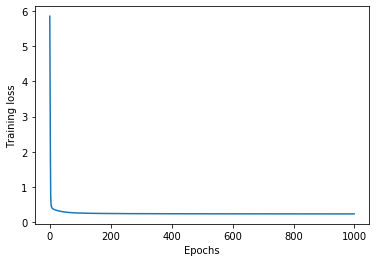

In [14]:
## Plotting the loss
ax = np.arange(len(loss))
plt.plot(ax,loss)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

In [15]:
# Normalization of test set
x_test = np.empty(x_test1.shape)
for i in range(0,x_test1.shape[1]):
    if(i in ind1):
        x_test[:,i] = x_test1[:,i] - m[i]*np.ones(x_test1[:,i].shape)
        x_test[:,i] = x_test[:,i]/v[i]
    else:
        x_test[:,i] = x_test1[:,i]

In [16]:
## Predicting on test set and finding accuracy on test set
print("Predicting on test set")
y_hat = sigmoid(x_test@w)
loss = -np.sum(y_test*np.log(y_hat+1e-8) + (1-y_test)*np.log(1-y_hat+1e-8))/y_hat.shape[0]
print("Testing loss =",loss)
for i in range(0,y_hat.shape[0]):
    if(y_hat[i]<0.5):
        y_hat[i] = 0
    else:
        y_hat[i] = 1
tot = 0.0
for i in range(0,y_hat.shape[0]):
    if(y_hat[i]==y_test[i]):
        tot+=1   
print("Testing accuracy =",(tot/y_hat.shape[0])*100,"%")

Predicting on test set
Testing loss = 0.8166254414215869
Testing accuracy = 58.26656955571741 %
